1. What is the fundamental idea behind Support Vector Machines?
    The fundamental idea behind Support Vector Machines is to fit the widest possible “street” between the classes. In other words, the goal is to have the largest possible margin between the decision boundary that separates the two classes and the training instances. When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street). Another key idea is to use kernels when training on nonlinear datasets.
2. What is a support vector?
    After training an SVM, a support vector is any instance located on the “street” (see the previous answer), including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., off the street) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street they won’t affect the decision boundary. Computing the predictions only involves the support vectors, not the whole training set.
3. Why is it important to scale the inputs when using SVMs?
    SVMs try to fit the largest possible “street” between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features
4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
    An SVM classifier can output the distance between the test instance and the decision boundary, and you can use this as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() methods to the SVM.
5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?
    This question applies only to linear SVMs since kernelized can only use the dual form. The computational complexity of the primal form of the SVM problem is proportional to the number of training instances m, while the computational complexity of the dual form is proportional to a number between m2 and m3. So if there are millions of instances, you should definitely use the primal form, because the dual form will be much too slow.
6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?
    If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To decrease it, you need to increase gamma or C (or both).
7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?
    Not solved

In [73]:
'''Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.'''
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
dataset = datasets.load_iris()

In [5]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Creating DataFrame to visualize the iris data
Index:
1. 0 Index for sepal length
2. 1 Index for sepal width
3. 2 Index for petal length
4. 3 Index for petal width

In [30]:
df = pd.DataFrame({dataset.feature_names[0]: dataset.data[:, 0], dataset.feature_names[1]: dataset.data[:, 1], dataset.feature_names[2]: dataset.data[:, 2], dataset.feature_names[3]: dataset.data[:, 3], 'category': dataset.target} )

In [47]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
x = df.iloc[:,2:4]

In [39]:
x.head(5)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [44]:
y = dataset.target
setosa_or_versicolor = (y == 0) | (y == 1)
X = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Pretty important to scale the data!

In [67]:

scale = StandardScaler();
X_scaled = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Verify if our data is linearly separable

No handles with labels found to put in legend.


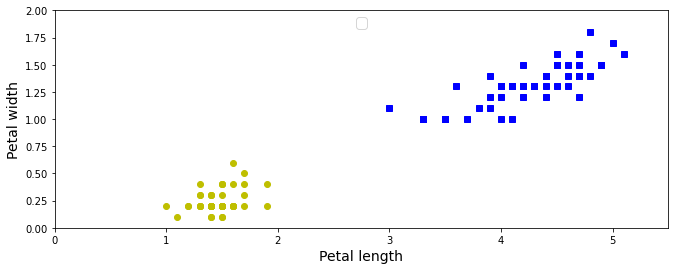

In [64]:
plt.figure(figsize=(11, 4))
plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

### Using LinearSVC

In [80]:
linear_clf = LinearSVC(loss="hinge", C=5, random_state=42)
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Using SVC

In [83]:
svc_clf = SVC(kernel="linear", C=5)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Using SGDClassifier

In [87]:
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", random_state=42, eta0=0.001)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0